## first predictive modeling with mean

In [3]:
# predict the sale price

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('td2.csv')
data

,sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,waterfront_view_Yes,zipcode_group_zipcode_group_1,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,NaN,7,1180.0,0,...,False,False,False,False,False,False,False,False,False,False
1,538000.0,3,2.25,2570.0,7242.0,2.0,NaN,7,2170.0,400,...,False,False,True,False,False,False,False,False,False,False
2,180000.0,2,1.00,770.0,10000.0,1.0,NaN,6,770.0,0,...,False,False,True,False,False,False,False,False,False,False
3,604000.0,4,3.00,1960.0,5000.0,1.0,NaN,7,1050.0,910,...,False,False,False,True,False,False,False,False,False,False
4,510000.0,3,2.00,1680.0,8080.0,1.0,NaN,8,1680.0,0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,NaN,8,1530.0,0,...,False,False,False,True,False,False,False,False,False,False
21605,400000.0,4,2.50,2310.0,5813.0,2.0,NaN,8,2310.0,0,...,False,True,False,False,False,False,False,False,False,False
21606,402101.0,2,0.75,1020.0,1350.0,2.0,NaN,7,1020.0,0,...,False,False,False,True,False,False,False,False,False,False
21607,400000.0,3,2.50,1600.0,2388.0,2.0,NaN,8,1600.0,0,...,False,False,False,False,True,False,False,False,False,False


In [6]:
data['mean_sale_price']=data['sale_price'].mean()
data['mean_sale_price']

0        511618.558147
1        511618.558147
2        511618.558147
3        511618.558147
4        511618.558147
             ...      
21604    511618.558147
21605    511618.558147
21606    511618.558147
21607    511618.558147
21608    511618.558147
Name: mean_sale_price, Length: 21609, dtype: float64

In [7]:
#visualization 

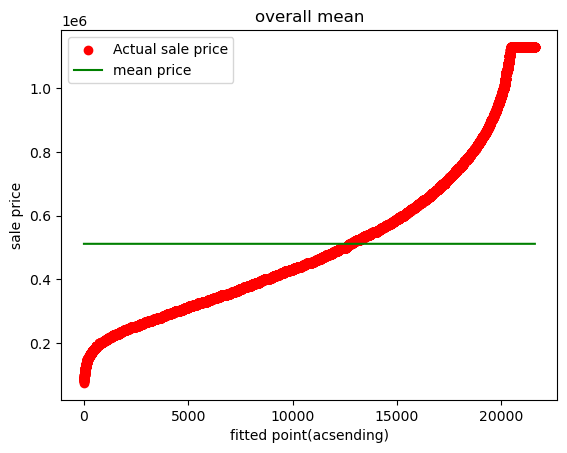

In [8]:
plt.figure(dpi = 100)
x = range(0,len(data))
y = data['sale_price']
y1 = data['mean_sale_price']
plt.scatter(x, y.sort_values(), color = 'red', label = 'Actual sale price')
plt.plot(x, y1.sort_values(), color = 'green', label = 'mean price')
plt.xlabel('fitted point(acsending)')
plt.ylabel('sale price')
plt.title('overall mean')
plt.legend()

In [9]:
# IMPROVING MEAN REGRESSION MODEL

In [10]:
# mean wrt overall grade
grades_mean= data.pivot_table( values = 'sale_price', columns='Overall Grade', aggfunc=np.mean)
grades_mean

C:\Users\vijay\AppData\Local\Temp\ipykernel_12332\1790430085.py:2: FutureWarning: The provided callable <function mean at 0x000002495750D940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grades_mean= data.pivot_table( values = 'sale_price', columns='Overall Grade', aggfunc=np.mean)


Overall Grade,1,2,3,4,5,6,7,8,9,10
sale_price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [11]:
#grade_mean= data.pivot_table( values = 'sale_price', columns='zipcode_group_zipcode_group_1', aggfunc=np.mean)
#grade_mean

In [12]:
#making new column
data['grade_mean']=0
# for every grade filling its mean price in new colunm
for i in grades_mean.columns:
    data['grade_mean'][data['Overall Grade']==i] = grades_mean[i][0]
data['grade_mean'].head()

C:\Users\vijay\AppData\Local\Temp\ipykernel_12332\3899804545.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['grade_mean'][data['Overall Grade']==i] = grades_mean[i][0]
C:\Users\vijay\AppData\Local\Temp\ipykernel_12332\3899804545.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [13]:
#visual
gradewise_list=[]
for i in range(1,11):
    k = data['sale_price'][data['Overall Grade']==i]
    gradewise_list.append(k)
gradewise_list
    

[19450    142000.0
 Name: sale_price, dtype: float64,
 4409     1129575.0
 4809     1129575.0
 5449     1129575.0
 6039     1129575.0
 7033     1129575.0
 7250     1129575.0
 7905     1129575.0
 9252     1129575.0
 10371    1129575.0
 13409    1129575.0
 13698    1129575.0
 14554    1129575.0
 19015    1129575.0
 Name: sale_price, dtype: float64,
 1147     75000.0
 3221    262000.0
 5830    280000.0
 Name: sale_price, dtype: float64,
 348      299000.0
 463       80000.0
 1064     140000.0
 3580     355000.0
 3883     248000.0
 4866     228000.0
 5202     352000.0
 6478     217000.0
 7971     120000.0
 8595     205000.0
 8617     355000.0
 8621     325000.0
 9639     330000.0
 9792     435000.0
 11498    229050.0
 11586    188000.0
 12073    156000.0
 13999    130000.0
 14089    152000.0
 14579     95000.0
 15038    200000.0
 15710    150000.0
 16338    100000.0
 16528     90000.0
 17392    145000.0
 18050    247000.0
 18164    230000.0
 18377    265000.0
 19342    151000.0
 Name: sale

In [14]:
classwise_list=[]
for i in range(1,11):
    k=data['sale_price'][data['Overall Grade']==i]
    classwise_list.append(k)

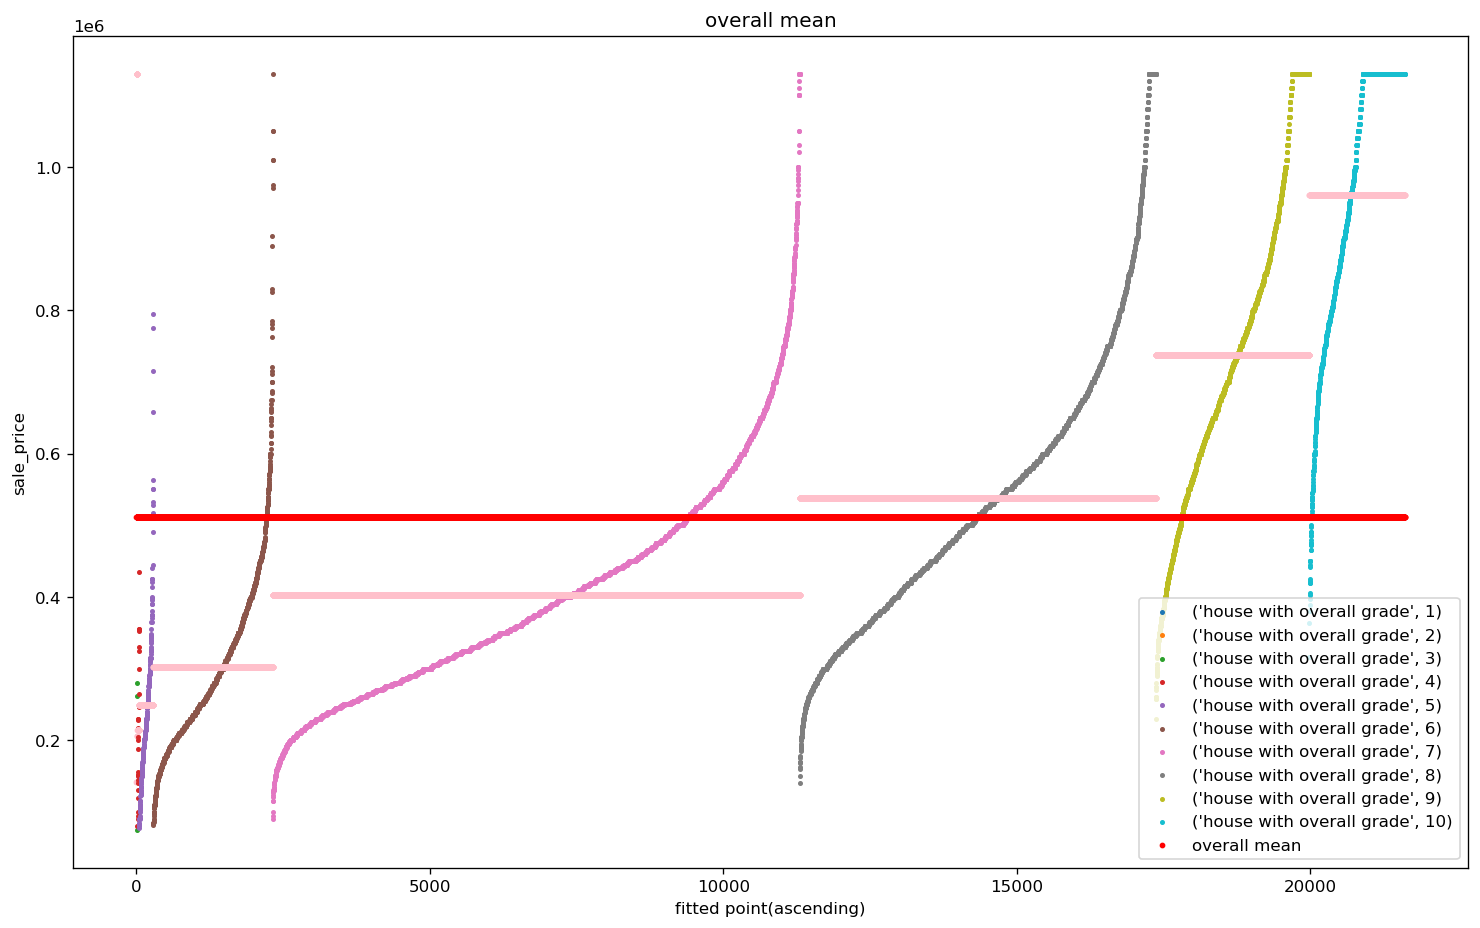

In [15]:
plt.figure(dpi=120, figsize=(15,9))
#ploting sale price gradewise
# z variable is for x axis

z=0
for i in range(1,11):
    #defining x axis using z
    points = [k for k in range(z , z+len(classwise_list[i-1]))]
    
    #plotting
    plt.scatter(points , classwise_list[i-1].sort_values(), label=("house with overall grade" , i),s=4)
    
    #ploting gradewise
    plt.scatter(points,
                [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))], s = 6 , color= 'pink')
    z= max(points) + 1
    
# plotting overall mean
plt.scatter([ q for q in range(0,z)] , data['mean_sale_price'], color='red', label = 'overall mean', s=6)
plt.xlabel('fitted point(ascending)')
plt.ylabel('sale_price')
plt.title('overall mean')
plt.legend(loc = 4)

# # RESIDUAL PLOT

In [16]:
# RESIDUAL = PREDICT - ACTUAL 
mean_diff = data['mean_sale_price'] - data['sale_price']
grade_mean_diff = data['grade_mean'] - data['sale_price']

In [17]:
mean_diff

0        289718.558147
1        -26381.441853
2        331618.558147
3        -92381.441853
4          1618.558147
             ...      
21604    151618.558147
21605    111618.558147
21606    109517.558147
21607    111618.558147
21608    186618.558147
Length: 21609, dtype: float64

In [18]:
grade_mean_diff

0        180339.619779
1       -135760.380221
2        121882.014720
3       -201760.380221
4         27584.082097
             ...      
21604    177584.082097
21605    137584.082097
21606       138.619779
21607    137584.082097
21608     77239.619779
Length: 21609, dtype: float64

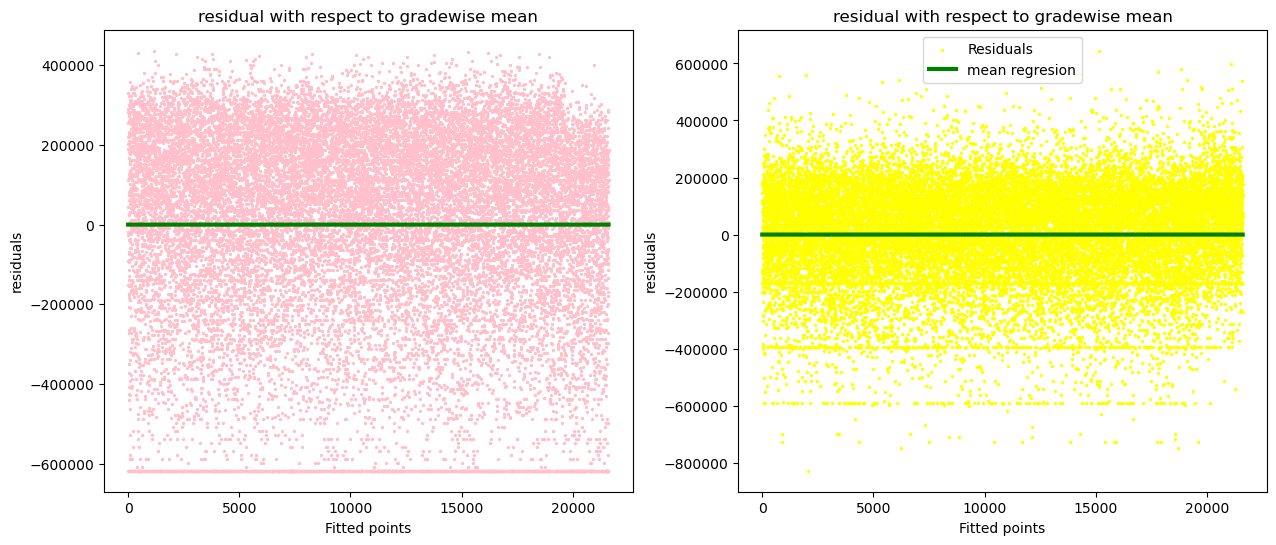

In [19]:
x = range(0, len(data))
y = [0 for i in range(len(data))]
plt.figure( dpi=100 ,figsize =(15,6))

plt.subplot(1,2,1)
plt.scatter(x, mean_diff, color= 'pink', label= 'Residuals', s=2 )
plt.plot(x, y, color= "green", label= 'mean regresion', linewidth=3)
plt.xlabel('Fitted points')
plt.ylabel('residuals')
plt.title('residual with respect to gradewise mean')

plt.subplot(1,2,2)
plt.scatter(x, grade_mean_diff, color= 'yellow', label= 'Residuals', s=2 )
plt.plot(x, y, color= "green", label= 'mean regresion', linewidth=3)
plt.xlabel('Fitted points')
plt.ylabel('residuals')
plt.legend()
plt.title('residual with respect to gradewise mean')
plt.legend()


## MAE

In [20]:
#simple mean
cost = sum(mean_diff)/len(data)
print(round(cost,7))

0.0


In [21]:
y = data['sale_price']
y1 = data['mean_sale_price']
y2 = data['grade_mean']
n = len(data)

In [22]:
cost_mean = sum(abs(y1-y))/n
cost_mean

199168.78146839526

In [23]:
# lesser one better one
cost_grade_mean = sum(abs(y2-y))/n
cost_grade_mean

137081.70298203363

In [24]:
from sklearn.metrics import mean_absolute_error 
cost_grade_mean = mean_absolute_error(y2,y)
cost_grade_mean

137081.7029820291

## mse 

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
cost_mean = mean_squared_error(y1,y)
cost_mean

62528116847.799576

In [27]:
cost_grade_mean = mean_squared_error(y2,y)
cost_grade_mean

30804835720.342426

## rsme

In [28]:
cost_mean = mean_squared_error(y1,y)**0.5
cost_mean

250056.2273725643

In [29]:
cost_grade_mean = mean_squared_error(y2,y)**0.5
cost_grade_mean

175513.06424406826

## R^2 

In [30]:
y = data['sale_price']
y_bar = data['mean_sale_price']
y_hat = data['grade_mean']
n=len(data)

In [31]:
len(y),len(y_hat),len(y_bar),n

(21609, 21609, 21609, 21609)

In [32]:
mse_mean = mean_squared_error(y_bar,y)
mse_model = mean_squared_error(y_hat,y)

In [33]:
R2 = 1 - (mse_model / mse_mean)
R2

0.5073442592981836

## LINEAR REGRESSION

In [34]:
sale_price = data['sale_price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({'sale_price' : sale_price , 'flat_area' : flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


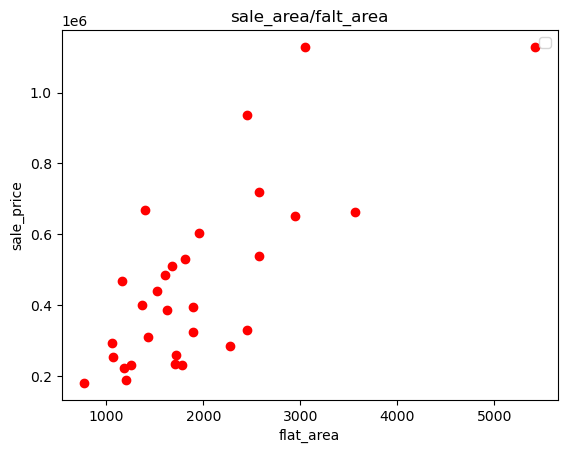

In [35]:
plt.figure(dpi=100)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'red' )
plt.xlabel('flat_area')
plt.ylabel('sale_price')
plt.title('sale_area/falt_area')
plt.legend()
plt.show()

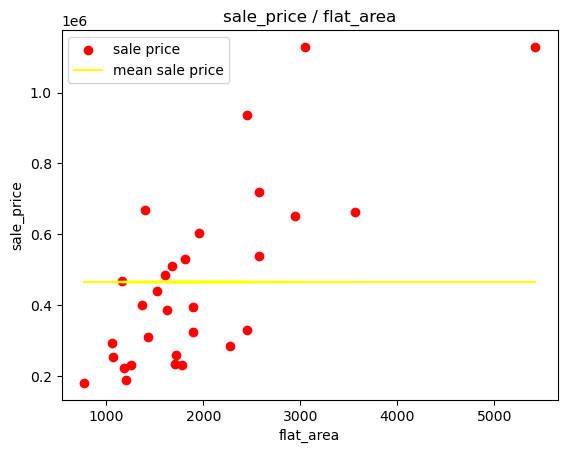

In [36]:
sample_data['mean_sale_price'] = sample_data.sale_price.mean()

plt.figure(dpi = 100)
plt.scatter(sample_data.flat_area, sample_data.sale_price , color = 'red' , label = 'sale price')
plt.plot(sample_data.flat_area, sample_data.mean_sale_price , color = 'yellow' , label='mean sale price')
plt.xlabel('flat_area')
plt.ylabel('sale_price')
plt.title('sale_price / flat_area')
plt.legend()
plt.show()

## cost curve funcn

Text(0.5, 1.0, 'slope : 0 with MSE : 281372081125.0')

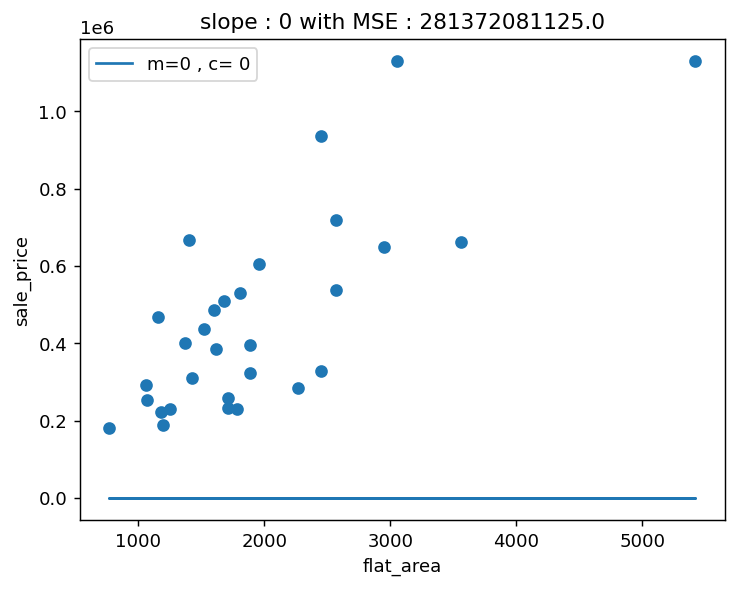

In [37]:
from sklearn.metrics import mean_squared_error
c = 0
m = 0
line = []
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)
    
plt.figure( dpi = 130)
plt.scatter(sample_data.flat_area , sample_data.sale_price )
plt.plot(sample_data.flat_area , line , label = 'm=0 , c= 0')
plt.xlabel('flat_area')
plt.ylabel('sale_price')
plt.legend()
MSE = mean_squared_error(sample_data.sale_price , line)
plt.title('slope' + ' : ' + str(m) + ' ' + 'with MSE' + ' : ' + str(MSE))


Text(0.5, 1.0, 'slope : 50 with MSE : 184728400708.33334')

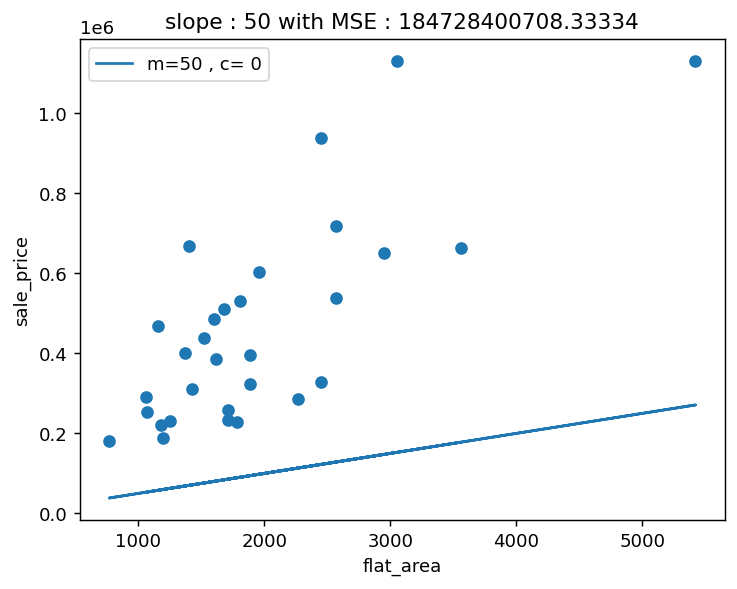

In [38]:
c = 0
m = 50
line = []
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)
plt.figure( dpi = 130)
plt.scatter(sample_data.flat_area , sample_data.sale_price )
plt.plot(sample_data.flat_area , line  , label = 'm=50 , c= 0')
plt.xlabel('flat_area')
plt.ylabel('sale_price')
plt.legend()
MSE = mean_squared_error(sample_data.sale_price , line)
plt.title('slope' + ' : ' + str(m) + ' ' + 'with MSE' + ' : ' + str(MSE))


In [39]:
# MSE large lets correct it 

In [40]:
def slope_error(slope , intercept , sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i]* slope + intercept
        sale.append(tmp)
   # MSE = mean_squared_error(sample_data.sale_price,sale)  
    MSE = np.mean((sample_data.sale_price - sale) ** 2)

    return MSE    

In [41]:
slope = [i/10 for i in range(0,5000)]
cost = []
for i in slope:
    cost1 = slope_error( slope = i , intercept = 0 , sample_data = sample_data)
    cost.append(cost1)

In [42]:
cost_table = pd.DataFrame({'slope' : slope , 'cost' : cost})
cost_table.tail()   

,slope,cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


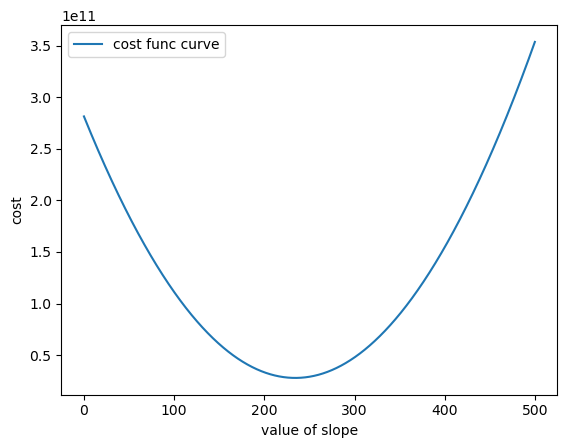

In [43]:
#plotting the cost values corresponding to every value of beta
plt.plot(cost_table.slope ,cost_table.cost , label = "cost func curve")
plt.xlabel('value of slope')
plt.ylabel('cost')
plt.legend()
#cost funcn curve


In [44]:
# SLOPE 
new_slope = cost_table['slope'][cost_table['cost']==cost_table['cost'].min()]
new_slope

2343    234.3
Name: slope, dtype: float64

In [45]:
# intercept 
def intercept_error(slope, intercept , sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i]* slope + intercept
        sale.append(tmp)
   # MSE = mean_squared_error(sample_data.sale_price,sale)  
    MSE = np.mean((sample_data.sale_price - sale) ** 2)

    return MSE     

In [46]:
intercept = [i for i in range(5000,50000)]
cost = []
for i in intercept:
    cost1 = intercept_error(slope = 234, intercept = i , sample_data = sample_data)
    cost.append(cost1)


In [47]:
cost_table = pd.DataFrame({'intercept' : intercept , 'cost' : cost})
cost_table.tail()   

,intercept,cost
44995,49995,2.929862e+10
44996,49996,2.929870e+10
44997,49997,2.929878e+10
44998,49998,2.929886e+10
44999,49999,2.929894e+10


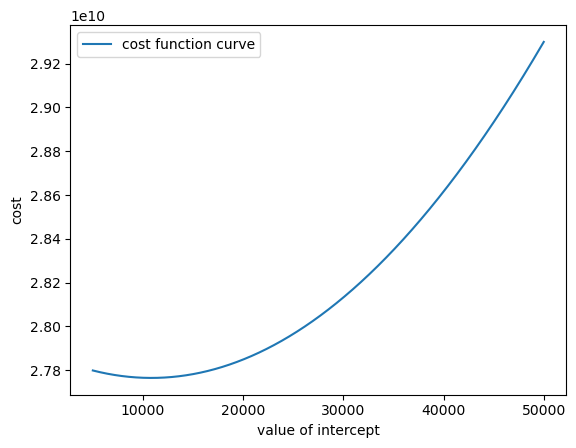

In [48]:
# plotting the cost value corresponding to every value of beta 
plt.plot(cost_table.intercept , cost_table.cost , label='cost function curve')
plt.xlabel('value of intercept')
plt.ylabel('cost')
plt.legend()

In [49]:
new_intercept = cost_table['intercept'][cost_table['cost']==cost_table['cost'].min()].values
new_intercept[0]

10834

In [50]:
#new_slope = cost_table['slope'][cost_table['cost'] == cost_table['cost'].min()]
#new_slope
# m = 219 c = 39428

## GRADIENT DESCENT

In [51]:
# initialize parameter
def para_init(y):
    m = 0.1
    c = y.mean()
    return m , c

In [52]:
# generate pridiction 
def generate_predictions(m,c,x):
    prediction=[]
    for i in x:
        pred = (m*i)+c
        prediction.append(pred)
    return prediction    

In [53]:
#calculating cost
def compute_cost(prediction):
    cost = np.sum(((prediction - y)**2)/len(y))
    return cost


In [54]:
# UPDATING PARAMETERS
def gradients(prediction,y,x):
    n=len(y)
    gm=2/n*np.sum((prediction-y)*x)
    gc=2/n*np.sum((prediction-y))
    return gm,gc


In [55]:
def para_update(m_old,c_old,gm_old,gc_old,alpha):
    m_new = m_old - alpha * gm_old
    c_new = c_old - alpha * gc_old
    return m_new , c_new

NameError: name 'predictions' is not defined

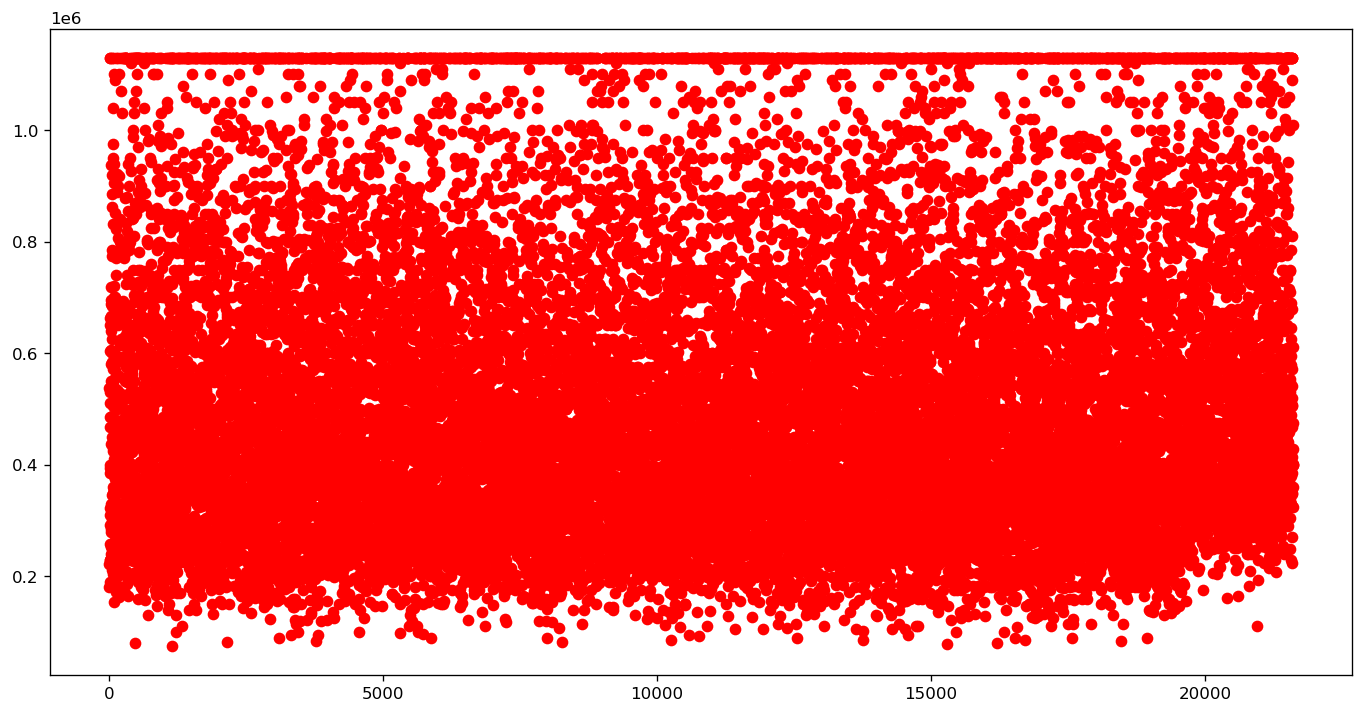

In [56]:
# result 
def result(m,c,x,y,cost,predictions,i):
    if i<max_iter - 1:
        print('** gradient descent converged at iteration {} **'.format(i))
    else:
        print('** result after', max_iter , 'iteration is : **')
        
# plotting the final result
plt.figure(figsize = (14,7) , dpi = 120)
plt.scatter(x,y,color ='red',label = 'data points')
label = 'final reg. line ; m = {} ; c = {}'.format(str(m) , str(c))
plt.plot(x,predictions,color='green',label='label')
plt.xlabel('flat_area')
plt.ylabel('sale_price')
plt.title('final reg line')
plt.legend()

In [ ]:
''' sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)

max_iter=1000
cost_old=0
alpha=0.01

#step1
m,c=para_init(sale_price)

for i in range(0,max_iter):
    #step2
    predictions= generate_predictions(m,c,flat_area)
    #step3
    cost_new = compute_cost(predictions , sale_price)
    
    if abs(cost_new-cost_old)<10^-7:
        break
    gm,gc=gradients(predictions,sale_price,flat_area)
    
    #step4
    m,c=param_update(m,c,gm,gc,alpha)
    if i%20==0:
        print('after iteration' , i ,':m = ',m,'; c = ',c, '; cost = ', cost_new)
    cost_old = cost_new
result(m,c,flat_area,sale_price,cost_new,prediction,i)        
        '''

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

max_iter=1000
cost_old=0
alpha=0.01

#step1
m,c=para_init(sale_price)

for i in range(0,max_iter):
    #step2
    predictions= generate_predictions(m,c,flat_area)
    #step3
    cost_new = compute_cost(predictions , sale_price)
    
    if abs(cost_new-cost_old)<10^-7:
        break
    gm,gc=gradients(predictions,sale_price,flat_area)
    
    #step4
    m,c=param_update(m,c,gm,gc,alpha)
    if i%20==0:
        print('after iteration' , i ,':m = ',m,'; c = ',c, '; cost = ', cost_new)
    cost_old = cost_new
result(m,c,flat_area,sale_price,cost_new,prediction,i)        
        

## ASSUMPTION OF LINEAR REG.

## IMPLIMENTING L. REG.

In [ ]:
# IMPORTING LIB. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import warnings
warnings.filterwarnings(action = 'ignore')


In [ ]:
# step 1 ,2 ,3 done after import file
data = pd.read_csv('td2.csv')
data

In [ ]:
# scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y=data['sale_price']
x=scaler.fit_transform(data.drop(columns = ['sale_price']))
x = pd.DataFrame(data = x , columns = data.drop(columns = ['sale_price']).columns)
x.head()

### checking and removing multicolinearity 

In [ ]:
x.corr()

In [ ]:
# pair of corelation of independent varable greater thqan 0.5

k = x.corr()
z = [[str(i) , str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5)) and i!=j]
z , len(z)